In [33]:
# Importing Libraries
import requests
import pandas as pd
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB as Naive_Bayes
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
from xgboost import XGBClassifier

from IPython.display import display

In [34]:
import pandas as pd
url_string = r'C:\Users\USER\Downloads\synthetic_mobile_money_transaction_dataset.csv'

In [35]:
# Read the content of the local file directly, as 'requests' is for URLs, not local file paths.
with open(url_string, 'rb') as source_file:
    url_content = source_file.read()

# Write the content to 'data.csv'
with open('data.csv', 'wb') as data_file:
    data_file.write(url_content)

In [36]:
# Reading Data Into Pandas Dataframe
df = pd.read_csv('data.csv')
df

,step,transactionType,amount,initiator,oldBalInitiator,newBalInitiator,recipient,oldBalRecipient,newBalRecipient,isFraud
0,0,TRANSFER,19824.96,4537027967639631,187712.18,167887.22,4875702729424478,8.31,19833.27,1
1,0,PAYMENT,598.97,4296267625767470,8.92,8.92,25-0000401,0.00,0.00,0
2,0,PAYMENT,545.85,4178224023847746,93.60,-452.25,13-0001587,0.00,545.85,0
3,0,TRANSFER,19847.01,4178224023847746,-452.25,-20299.26,4096920916696293,4011.72,23858.74,1
4,0,PAYMENT,546.89,4779013371563747,159148.76,158601.88,75-0003564,0.00,546.89,0
...,...,...,...,...,...,...,...,...,...,...
1720176,143,DEPOSIT,189001.06,4663743651962693,3153757.97,3342759.03,72-0003211,132293.79,132293.79,0
1720177,143,PAYMENT,700.80,4823452294389366,4949410.71,4948709.91,23-0002032,143754.84,144455.64,0
1720178,143,TRANSFER,83799.76,4823452294389366,4948709.91,4864910.15,4271888998665790,16908.07,100707.82,1
1720179,143,PAYMENT,599.78,4118786864093625,3739281.18,3738681.40,35-0003267,109393.87,109993.65,0


## Data Preprocessing ##
##### The following steps are performed on the dataset in this section: #####

- Dropping Redudant Columns
- Checking For Duplicated Rows
- Checking For Missing Values

In [37]:
df.head(10)

,step,transactionType,amount,initiator,oldBalInitiator,newBalInitiator,recipient,oldBalRecipient,newBalRecipient,isFraud
0,0,TRANSFER,19824.96,4537027967639631,187712.18,167887.22,4875702729424478,8.31,19833.27,1
1,0,PAYMENT,598.97,4296267625767470,8.92,8.92,25-0000401,0.00,0.00,0
2,0,PAYMENT,545.85,4178224023847746,93.60,-452.25,13-0001587,0.00,545.85,0
3,0,TRANSFER,19847.01,4178224023847746,-452.25,-20299.26,4096920916696293,4011.72,23858.74,1
4,0,PAYMENT,546.89,4779013371563747,159148.76,158601.88,75-0003564,0.00,546.89,0
5,0,TRANSFER,16973.75,4779013371563747,158601.88,141628.12,4593247015015219,54.33,17028.08,1
6,0,PAYMENT,659.02,4479448076398077,261950.48,261291.46,11-0003866,0.00,659.02,0
7,0,TRANSFER,21103.99,4479448076398077,261291.46,240187.47,4649550475321678,19.63,21123.63,1
8,0,PAYMENT,648.89,4587942659105635,4808.94,4160.05,64-0008405,0.00,648.89,0
9,0,TRANSFER,16908.07,4587942659105635,4160.05,4160.05,4863167876028593,66.12,66.12,1


In [38]:
df.tail(10)

,step,transactionType,amount,initiator,oldBalInitiator,newBalInitiator,recipient,oldBalRecipient,newBalRecipient,isFraud
1720171,143,PAYMENT,598.60,4642078290226101,3261449.00,3260850.40,33-0001633,311814.46,312413.06,0
1720172,143,TRANSFER,20019.60,4642078290226101,3260850.40,3240830.80,4376270629948776,110910.41,130930.01,0
1720173,143,DEPOSIT,77737.67,4378454631056756,2317438.86,2395176.53,62-0002899,329166.39,329166.39,0
1720174,143,PAYMENT,13712.36,4663743651962693,3532525.89,3518813.53,82-0001293,217643.97,231356.33,0
1720175,143,TRANSFER,365055.56,4663743651962693,3518813.53,3153757.97,4699630955427804,819806.00,1184861.55,0
1720176,143,DEPOSIT,189001.06,4663743651962693,3153757.97,3342759.03,72-0003211,132293.79,132293.79,0
1720177,143,PAYMENT,700.80,4823452294389366,4949410.71,4948709.91,23-0002032,143754.84,144455.64,0
1720178,143,TRANSFER,83799.76,4823452294389366,4948709.91,4864910.15,4271888998665790,16908.07,100707.82,1
1720179,143,PAYMENT,599.78,4118786864093625,3739281.18,3738681.40,35-0003267,109393.87,109993.65,0
1720180,143,TRANSFER,17190.81,4118786864093625,3738681.40,3721490.60,4438993966712101,33807.10,50997.91,0


In [39]:
print('Number of Features In Dataset :', df.shape[1])
print('Number of Instances In Dataset : ', df.shape[0])

Number of Features In Dataset : 10
Number of Instances In Dataset :  1720181


In [40]:
# Exploring Information About Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1720181 entries, 0 to 1720180
Data columns (total 10 columns):
 #   Column           Dtype  
---  ------           -----  
 0   step             int64  
 1   transactionType  object 
 2   amount           float64
 3   initiator        int64  
 4   oldBalInitiator  float64
 5   newBalInitiator  float64
 6   recipient        object 
 7   oldBalRecipient  float64
 8   newBalRecipient  float64
 9   isFraud          int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 131.2+ MB


In [41]:
df.describe()

,step,amount,initiator,oldBalInitiator,newBalInitiator,oldBalRecipient,newBalRecipient,isFraud
count,1.720181e+06,1.720181e+06,1.720181e+06,1.720181e+06,1.720181e+06,1.720181e+06,1.720181e+06,1.720181e+06
mean,6.555529e+01,5.253868e+04,4.499952e+15,2.433758e+06,2.443880e+06,1.085083e+05,1.222772e+05,1.020346e-01
std,4.467368e+01,8.835650e+04,2.896351e+14,1.307615e+06,1.297181e+06,2.830138e+05,3.192277e+05,3.026939e-01
min,0.000000e+00,2.400000e-01,4.000062e+15,-1.999971e+05,-1.999971e+05,-1.983685e+05,-1.357280e+05,0.000000e+00
25%,2.300000e+01,6.064600e+02,4.248762e+15,1.577186e+06,1.600496e+06,1.606423e+04,2.496233e+04,0.000000e+00
50%,5.400000e+01,1.729825e+04,4.508521e+15,2.619827e+06,2.625680e+06,6.313018e+04,7.448161e+04,0.000000e+00
75%,1.060000e+02,7.116149e+04,4.750928e+15,3.361338e+06,3.361872e+06,1.373822e+05,1.431702e+05,0.000000e+00
max,1.430000e+02,2.142928e+06,4.999855e+15,1.224469e+07,1.224469e+07,1.188554e+07,1.206621e+07,1.000000e+00


In [42]:
print('Number of Duplicate Rows In Dataset :', df.duplicated().sum())

Number of Duplicate Rows In Dataset : 0


In [43]:
# Data Preprocessing: Checking For Missing Values
print('Number of Missing Values In Dataset :')
print(df.isnull().sum())



Number of Missing Values In Dataset :
step               0
transactionType    0
amount             0
initiator          0
oldBalInitiator    0
newBalInitiator    0
recipient          0
oldBalRecipient    0
newBalRecipient    0
isFraud            0
dtype: int64


In [46]:
# Data Preprocessing: One-Hot Encoding for 'transactionType'
# Convert the categorical 'transactionType' column into numerical format using one-hot encoding.
# 'drop_first=True' is used to avoid multicollinearity by dropping the first category.
# Added a check to ensure 'transactionType' column exists before attempting one-hot encoding,
# which prevents a KeyError if the column was already processed or dropped in a previous step.
if 'transactionType' in df.columns:
    df = pd.get_dummies(df, columns=['transactionType'], drop_first=True)
else:
    print("Warning: 'transactionType' column not found. Skipping one-hot encoding.")

# Drop 'initiator' and 'recipient' columns.
# These columns contain unique identifiers (some of which are non-numeric strings like '25-0000401')
# and are not suitable for direct numerical scaling, causing the ValueError.
# If these IDs were to be used, they would require a different encoding strategy (e.g., target encoding, hashing).
# Added 'errors='ignore'' to prevent a KeyError if the columns are already dropped or not found,
# making the operation more robust.
df = df.drop(columns=['initiator', 'recipient'], errors='ignore')

# Separating features (X) and target variable (y)
# 'isFraud' is the target variable, and all other columns are features.
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Feature Scaling using MinMaxScaler
# Initialize the MinMaxScaler to scale features to a range between 0 and 1.
scaler = MinMaxScaler()

# Identify and handle any remaining non-numeric columns in X before scaling.
# The ValueError "could not convert string to float: '25-0000401'" indicates that
# despite dropping 'initiator' and 'recipient', there might still be non-numeric data
# in the feature set X. This step ensures all features passed to the scaler are numeric.
non_numeric_cols = X.select_dtypes(exclude=['number']).columns
if len(non_numeric_cols) > 0:
    print(f"Warning: Non-numeric columns found in X before scaling: {list(non_numeric_cols)}")
    # Drop these columns as they are not suitable for direct numerical scaling.
    # This directly addresses the ValueError by removing problematic string columns.
    X = X.drop(columns=non_numeric_cols)
    print(f"Dropped non-numeric columns: {list(non_numeric_cols)}")

# Apply the scaler to all feature columns in X.
# fit_transform learns the min/max values and then scales the data.
X_scaled = scaler.fit_transform(X)
# Convert the scaled NumPy array back to a Pandas DataFrame, preserving column names.
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Handling Imbalanced Data using SMOTE (Synthetic Minority Over-sampling Technique)
# Fraud detection datasets are typically highly imbalanced, with very few fraud cases.
# SMOTE helps to balance the class distribution by generating synthetic samples for the minority class.
print("Before SMOTE, 'isFraud' distribution:")
print(y.value_counts())

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

print("\nAfter SMOTE, 'isFraud' distribution:")
print(y_resampled.value_counts())

# Display the shape of the resampled data to confirm the new number of instances
print(f"\nShape of X after SMOTE: {X_resampled.shape}")
print(f"Shape of y after SMOTE: {y_resampled.shape}")


Dropped non-numeric columns: ['transactionType_DEPOSIT', 'transactionType_PAYMENT', 'transactionType_TRANSFER', 'transactionType_WITHDRAWAL']
Before SMOTE, 'isFraud' distribution:
isFraud
0    1544663
1     175518
Name: count, dtype: int64

After SMOTE, 'isFraud' distribution:
isFraud
1    1544663
0    1544663
Name: count, dtype: int64

Shape of X after SMOTE: (3089326, 6)
Shape of y after SMOTE: (3089326,)


In [47]:
print('Number of Features In Dataset :', df.shape[1])
print('Number of Instances In Dataset : ', df.shape[0])

Number of Features In Dataset : 11
Number of Instances In Dataset :  1720181


In [49]:
# Exploring Information About Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1720181 entries, 0 to 1720180
Data columns (total 11 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   step                        int64  
 1   amount                      float64
 2   oldBalInitiator             float64
 3   newBalInitiator             float64
 4   oldBalRecipient             float64
 5   newBalRecipient             float64
 6   isFraud                     int64  
 7   transactionType_DEPOSIT     bool   
 8   transactionType_PAYMENT     bool   
 9   transactionType_TRANSFER    bool   
 10  transactionType_WITHDRAWAL  bool   
dtypes: bool(4), float64(5), int64(2)
memory usage: 98.4 MB


In [50]:
# Checking For Duplicate Rows In Dataset
print('Number of Duplicated Rows :',df.duplicated().sum())

Number of Duplicated Rows : 127


In [51]:
df.drop_duplicates(inplace=True)
print('Number of Duplicated Rows After Removal:', df.duplicated().sum())
print('Shape of DataFrame After Duplicate Removal:', df.shape)


Number of Duplicated Rows After Removal: 0
Shape of DataFrame After Duplicate Removal: (1720054, 11)


In [52]:
# Checking For Duplicate Rows In Dataset
print('Number of Duplicated Rows :',df.duplicated().sum())

Number of Duplicated Rows : 0


In [53]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1720054 entries, 0 to 1720180
Data columns (total 11 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   step                        int64  
 1   amount                      float64
 2   oldBalInitiator             float64
 3   newBalInitiator             float64
 4   oldBalRecipient             float64
 5   newBalRecipient             float64
 6   isFraud                     int64  
 7   transactionType_DEPOSIT     bool   
 8   transactionType_PAYMENT     bool   
 9   transactionType_TRANSFER    bool   
 10  transactionType_WITHDRAWAL  bool   
dtypes: bool(4), float64(5), int64(2)
memory usage: 111.5 MB


In [54]:
# Checking For Missing Values In Dataset
df.isna().sum()

step                          0
amount                        0
oldBalInitiator               0
newBalInitiator               0
oldBalRecipient               0
newBalRecipient               0
isFraud                       0
transactionType_DEPOSIT       0
transactionType_PAYMENT       0
transactionType_TRANSFER      0
transactionType_WITHDRAWAL    0
dtype: int64

### Exploratry Data Analysis ###

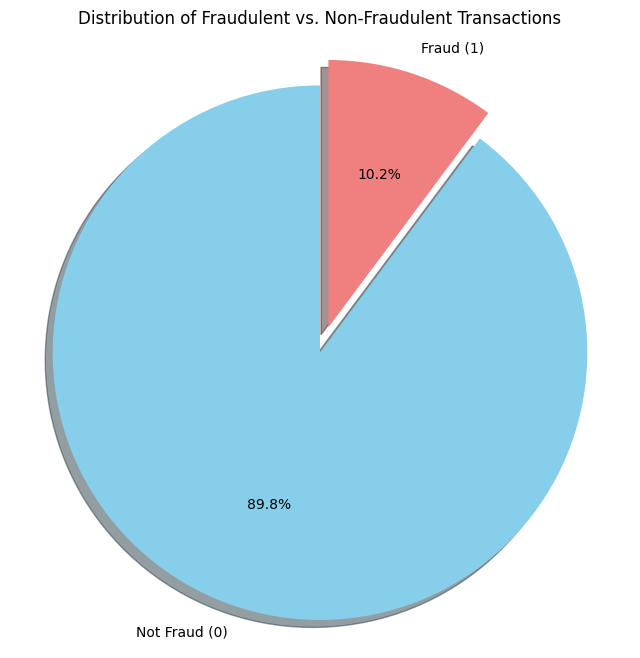

In [58]:
# 4. Balance of Data (isFraud) with more detail in a pie chart
fraud_counts = df['isFraud'].value_counts()
labels = ['Not Fraud (0)', 'Fraud (1)']
colors = ['skyblue', 'lightcoral']
explode = (0, 0.1) # Explode the 'Fraud' slice for emphasis

plt.figure(figsize=(8, 8))
plt.pie(fraud_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, shadow=True)
plt.title('Distribution of Fraudulent vs. Non-Fraudulent Transactions')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Ensure pandas is imported

df_plot = df.copy()
transaction_type_cols = [col for col in df_plot.columns if col.startswith('transactionType_')]

if transaction_type_cols:
    df_plot['transactionType'] = df_plot[transaction_type_cols].idxmax(axis=1).str.replace('transactionType_', '')
    print("Reconstructed 'transactionType' column for plotting purposes.")
else:
    print("Warning: 'transactionType' column and its one-hot encoded versions are missing. Transaction type plots will be skipped.")

Reconstructed 'transactionType' column for plotting purposes.


Distribution of 'isFraud':
isFraud
0    1544536
1     175518
Name: count, dtype: int64

Percentage of 'isFraud':
isFraud
0    89.795785
1    10.204215
Name: proportion, dtype: float64


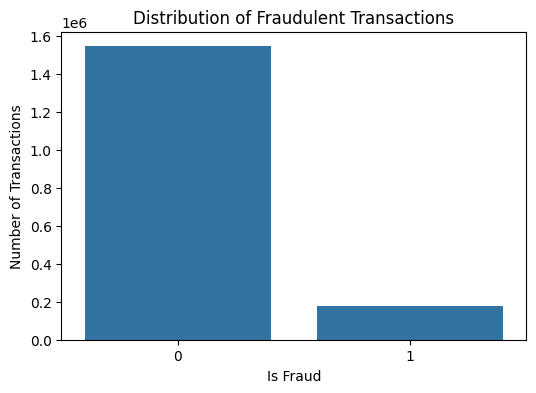

In [63]:
#  Distribution of the target variable 'isFraud'
print("Distribution of 'isFraud':")
print(df_plot['isFraud'].value_counts())
print("\nPercentage of 'isFraud':")
print(df_plot['isFraud'].value_counts(normalize=True) * 100)

plt.figure(figsize=(6, 4))
sns.countplot(x='isFraud', data=df_plot)
plt.title('Distribution of Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Number of Transactions')
plt.show()


Distribution of 'transactionType':
transactionType
PAYMENT       667118
TRANSFER      569328
DEPOSIT       389823
WITHDRAWAL     93785
Name: count, dtype: int64

Percentage of 'transactionType':
transactionType
PAYMENT       38.784713
TRANSFER      33.099426
DEPOSIT       22.663416
WITHDRAWAL     5.452445
Name: proportion, dtype: float64


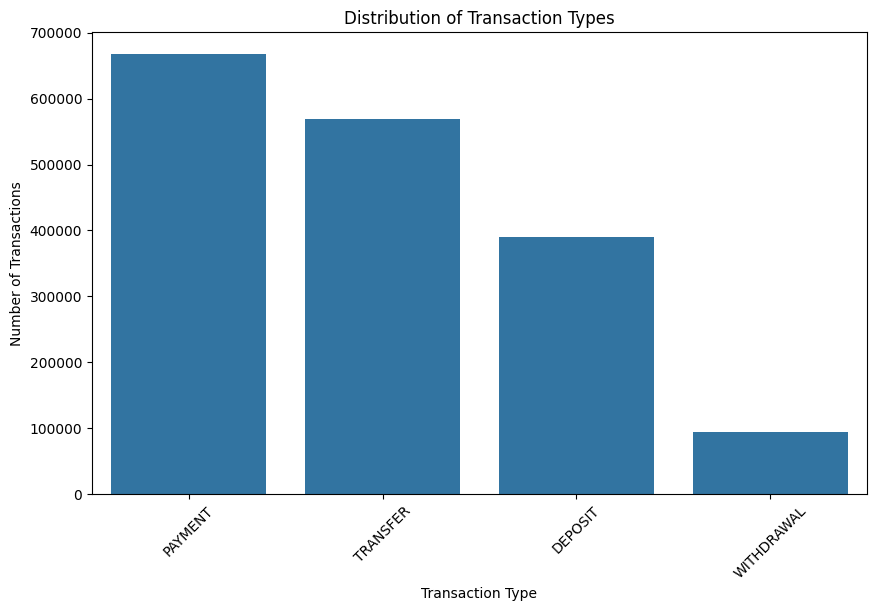

In [64]:
# Distribution of 'transactionType'
if 'transactionType' in df_plot.columns:
    print("\nDistribution of 'transactionType':")
    print(df_plot['transactionType'].value_counts())
    print("\nPercentage of 'transactionType':")
    print(df_plot['transactionType'].value_counts(normalize=True) * 100)

    plt.figure(figsize=(10, 6))
    sns.countplot(x='transactionType', data=df_plot, order=df_plot['transactionType'].value_counts().index)
    plt.title('Distribution of Transaction Types')
    plt.xlabel('Transaction Type')
    plt.ylabel('Number of Transactions')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("\nSkipping 'transactionType' distribution plots as the column is not available.")


Fraudulent transactions by 'transactionType':
isFraud                   0          1
transactionType                       
DEPOSIT          100.000000        NaN
PAYMENT          100.000000        NaN
TRANSFER          69.171023  30.828977
WITHDRAWAL       100.000000        NaN


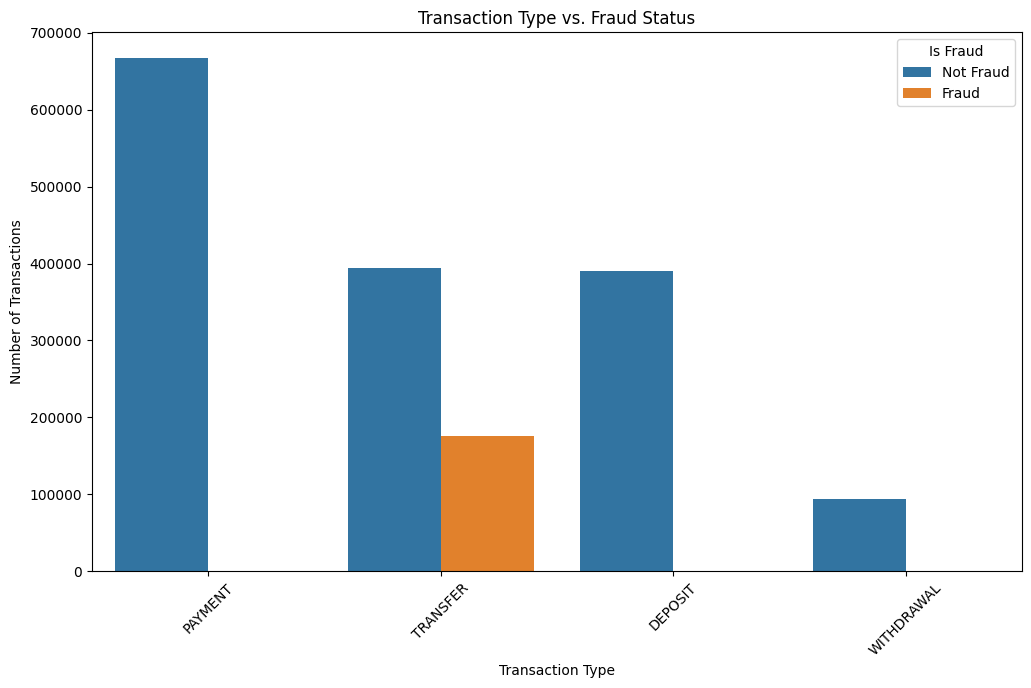

In [65]:
# Relationship between 'transactionType' and 'isFraud'
if 'transactionType' in df_plot.columns:
    print("\nFraudulent transactions by 'transactionType':")
    print(df_plot.groupby('transactionType')['isFraud'].value_counts(normalize=True).unstack() * 100)

    plt.figure(figsize=(12, 7))
    sns.countplot(x='transactionType', hue='isFraud', data=df_plot, order=df_plot['transactionType'].value_counts().index)
    plt.title('Transaction Type vs. Fraud Status')
    plt.xlabel('Transaction Type')
    plt.ylabel('Number of Transactions')
    plt.xticks(rotation=45)
    plt.legend(title='Is Fraud', labels=['Not Fraud', 'Fraud'])
    plt.show()
else:
    print("\nSkipping 'transactionType' vs. 'isFraud' relationship plots as the 'transactionType' column is not available.")


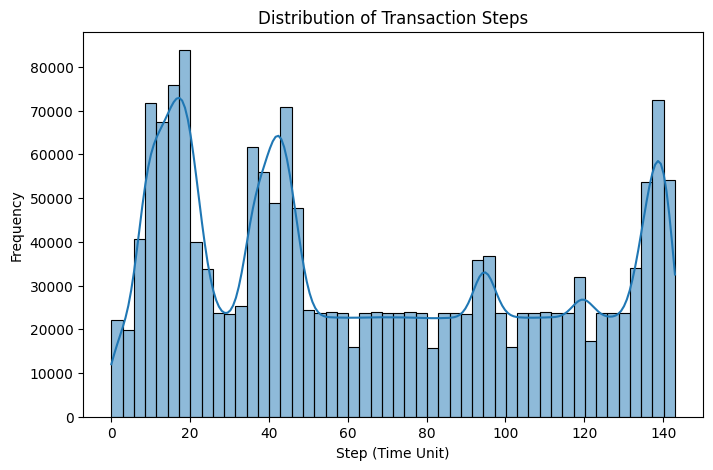

In [66]:
#  Histogram of 'step'
plt.figure(figsize=(8, 5))
sns.histplot(df_plot['step'], bins=50, kde=True)
plt.title('Distribution of Transaction Steps')
plt.xlabel('Step (Time Unit)')
plt.ylabel('Frequency')
plt.show()

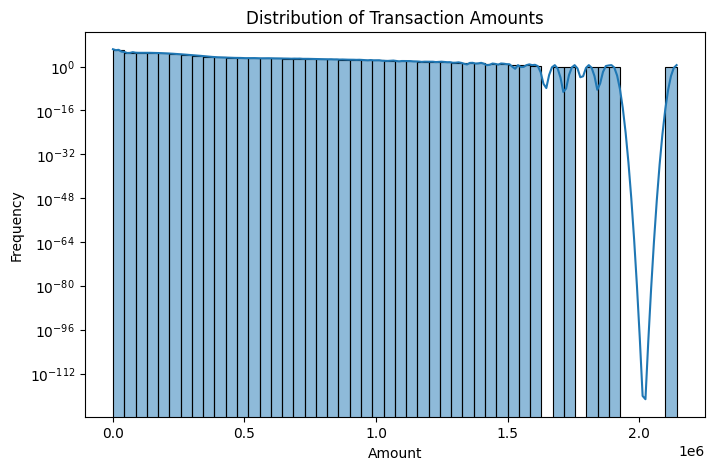

In [67]:
#  Histogram of 'amount'
plt.figure(figsize=(8, 5))
sns.histplot(df_plot['amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.yscale('log') # Use log scale for better visibility of smaller amounts
plt.show()

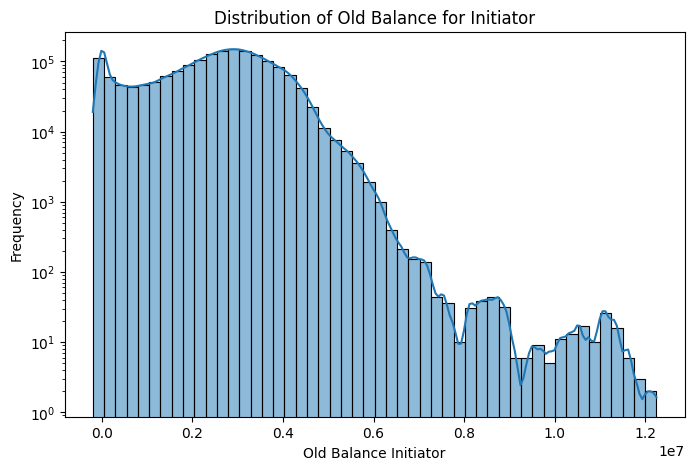

In [68]:
# Histogram of 'oldBalInitiator'
plt.figure(figsize=(8, 5))
sns.histplot(df_plot['oldBalInitiator'], bins=50, kde=True)
plt.title('Distribution of Old Balance for Initiator')
plt.xlabel('Old Balance Initiator')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

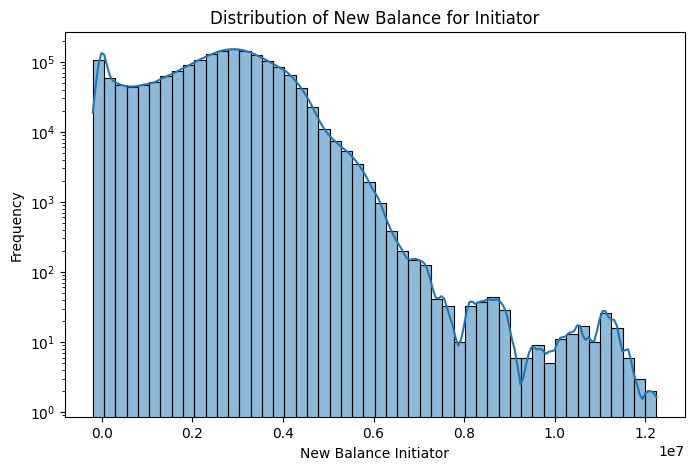

In [69]:
# Histogram of 'newBalInitiator'
plt.figure(figsize=(8, 5))
sns.histplot(df_plot['newBalInitiator'], bins=50, kde=True)
plt.title('Distribution of New Balance for Initiator')
plt.xlabel('New Balance Initiator')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

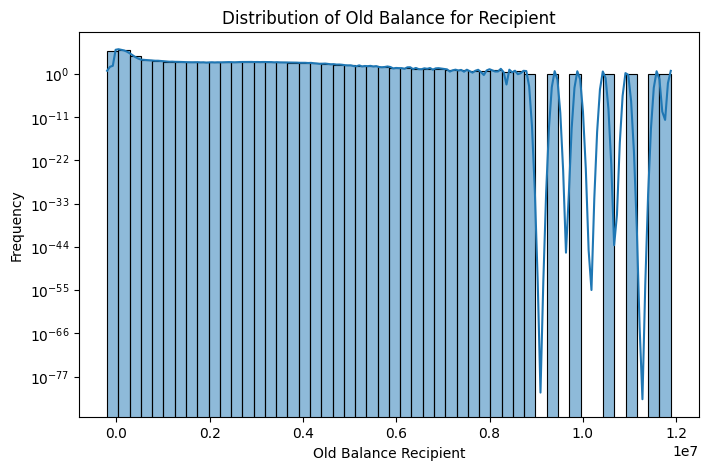

In [70]:
# Histogram of 'oldBalRecipient'
plt.figure(figsize=(8, 5))
sns.histplot(df_plot['oldBalRecipient'], bins=50, kde=True)
plt.title('Distribution of Old Balance for Recipient')
plt.xlabel('Old Balance Recipient')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

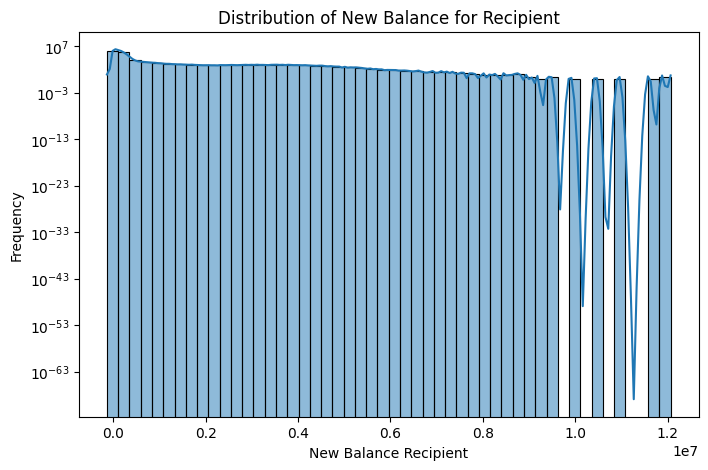

In [71]:
# Histogram of 'newBalRecipient'
plt.figure(figsize=(8, 5))
sns.histplot(df_plot['newBalRecipient'], bins=50, kde=True)
plt.title('Distribution of New Balance for Recipient')
plt.xlabel('New Balance Recipient')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

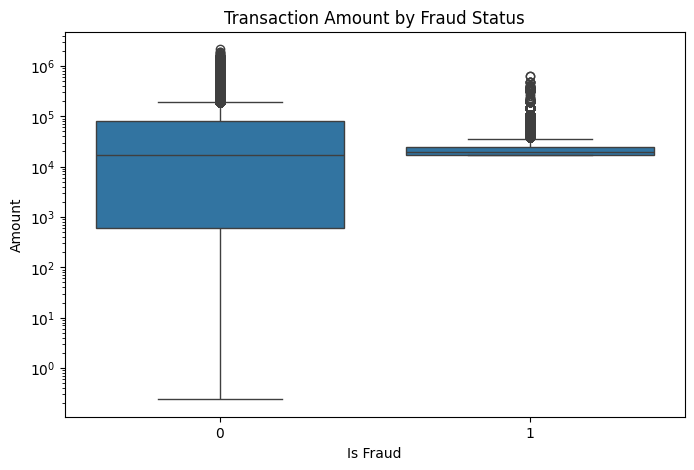

In [72]:
# Boxplot of 'amount' vs 'isFraud'
plt.figure(figsize=(8, 5))
sns.boxplot(x='isFraud', y='amount', data=df_plot)
plt.title('Transaction Amount by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Amount')
plt.yscale('log') # Log scale for better visualization of skewed data
plt.show()

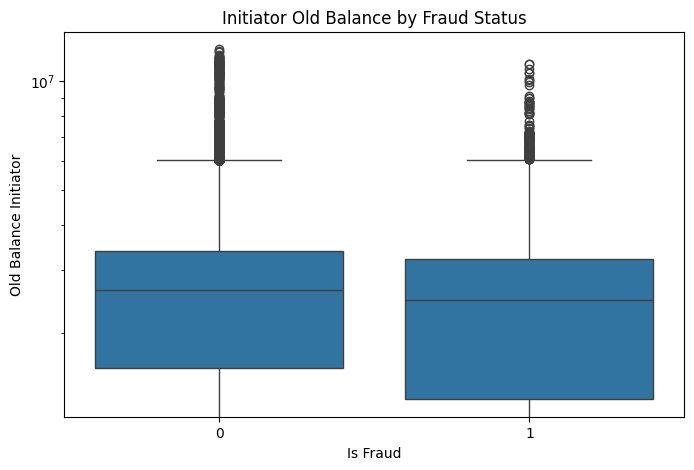

In [73]:
# Boxplot of 'oldBalInitiator' vs 'isFraud'
plt.figure(figsize=(8, 5))
sns.boxplot(x='isFraud', y='oldBalInitiator', data=df_plot)
plt.title('Initiator Old Balance by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Old Balance Initiator')
plt.yscale('log')
plt.show()

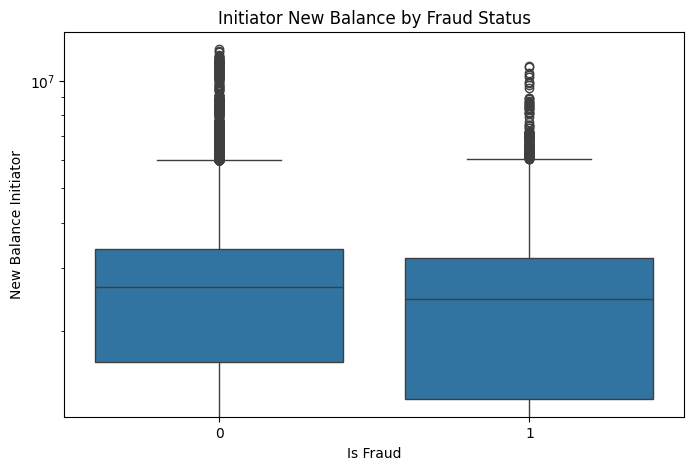

In [74]:
# Boxplot of 'newBalInitiator' vs 'isFraud'
plt.figure(figsize=(8, 5))
sns.boxplot(x='isFraud', y='newBalInitiator', data=df_plot)
plt.title('Initiator New Balance by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('New Balance Initiator')
plt.yscale('log')
plt.show()

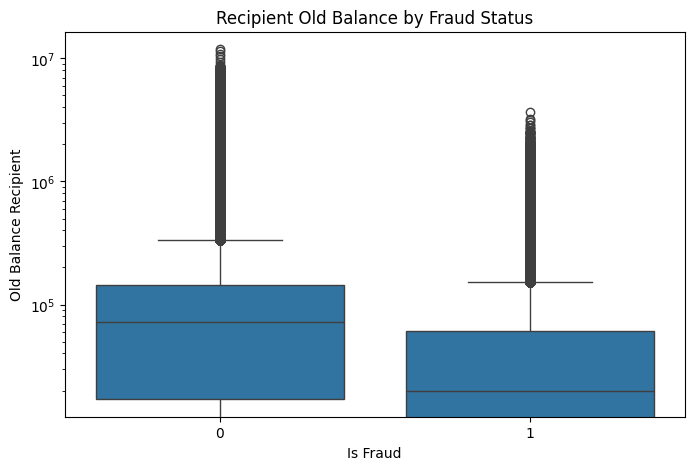

In [75]:
# Boxplot of 'oldBalRecipient' vs 'isFraud'
plt.figure(figsize=(8, 5))
sns.boxplot(x='isFraud', y='oldBalRecipient', data=df_plot)
plt.title('Recipient Old Balance by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Old Balance Recipient')
plt.yscale('log')
plt.show()

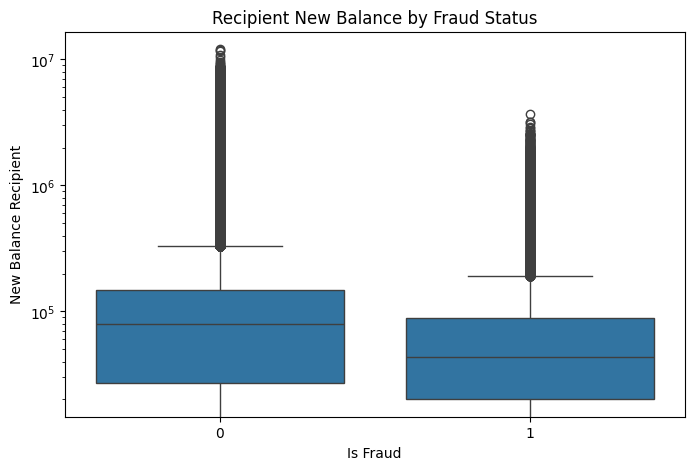

In [76]:
# Boxplot of 'newBalRecipient' vs 'isFraud'
plt.figure(figsize=(8, 5))
sns.boxplot(x='isFraud', y='newBalRecipient', data=df_plot)
plt.title('Recipient New Balance by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('New Balance Recipient')
plt.yscale('log')
plt.show()

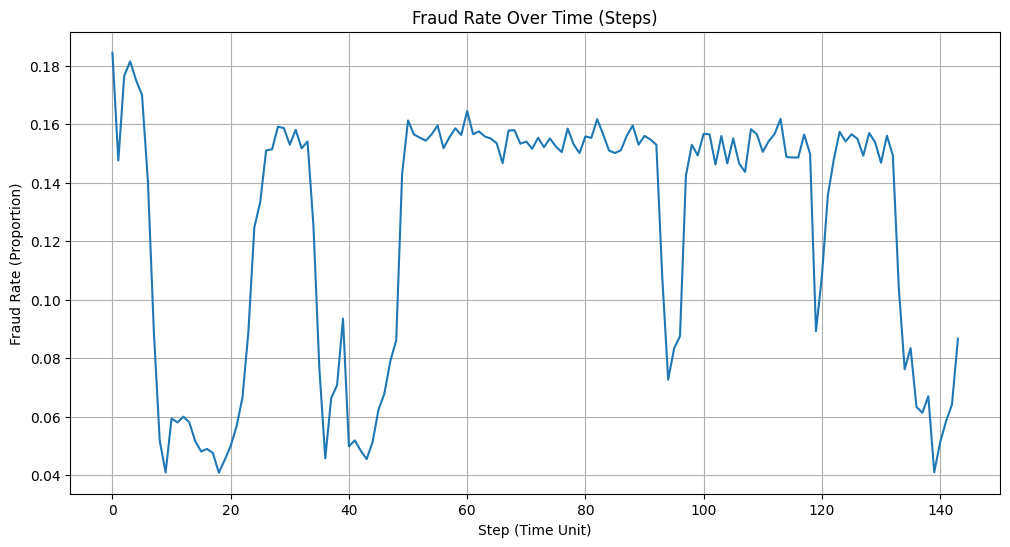

In [77]:
# Line plot: Fraud rate over 'step'
fraud_rate_by_step = df_plot.groupby('step')['isFraud'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='step', y='isFraud', data=fraud_rate_by_step)
plt.title('Fraud Rate Over Time (Steps)')
plt.xlabel('Step (Time Unit)')
plt.ylabel('Fraud Rate (Proportion)')
plt.grid(True)
plt.show()

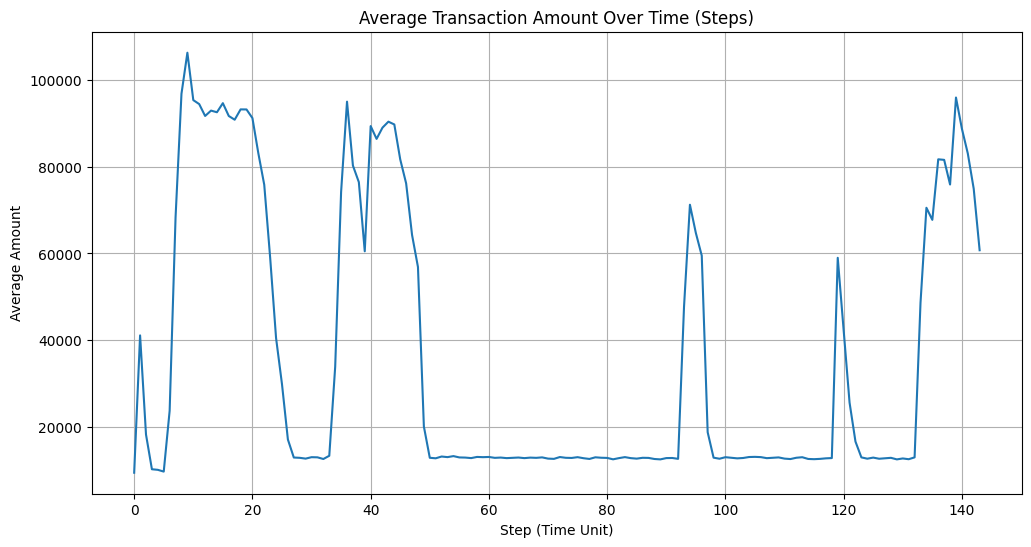

In [78]:
# Line plot: Average 'amount' over 'step'
avg_amount_by_step = df_plot.groupby('step')['amount'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='step', y='amount', data=avg_amount_by_step)
plt.title('Average Transaction Amount Over Time (Steps)')
plt.xlabel('Step (Time Unit)')
plt.ylabel('Average Amount')
plt.grid(True)
plt.show()

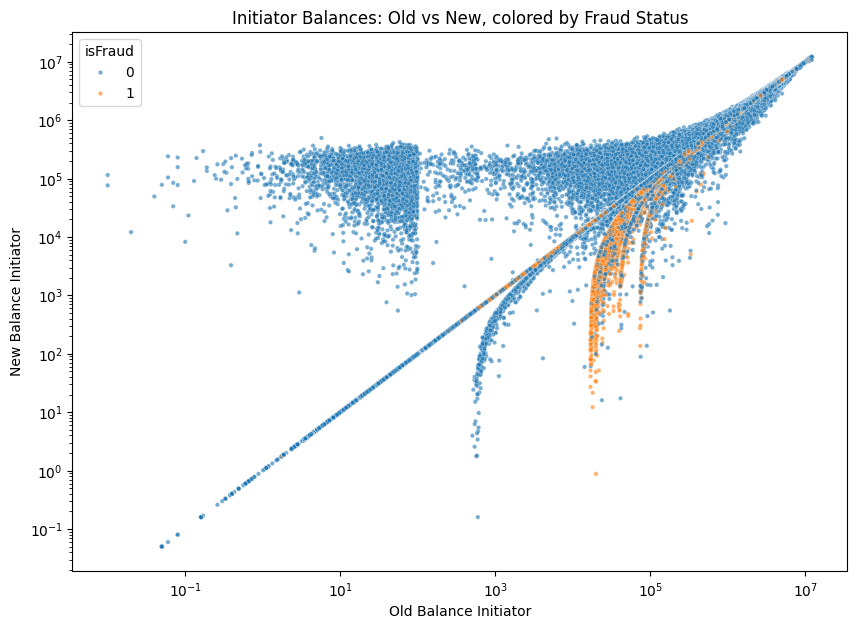

In [79]:
# Scatter plot: 'oldBalInitiator' vs 'newBalInitiator' with 'isFraud' hue
plt.figure(figsize=(10, 7))
sns.scatterplot(x='oldBalInitiator', y='newBalInitiator', hue='isFraud', data=df_plot, alpha=0.6, s=10)
plt.title('Initiator Balances: Old vs New, colored by Fraud Status')
plt.xlabel('Old Balance Initiator')
plt.ylabel('New Balance Initiator')
plt.xscale('log')
plt.yscale('log')
plt.show()

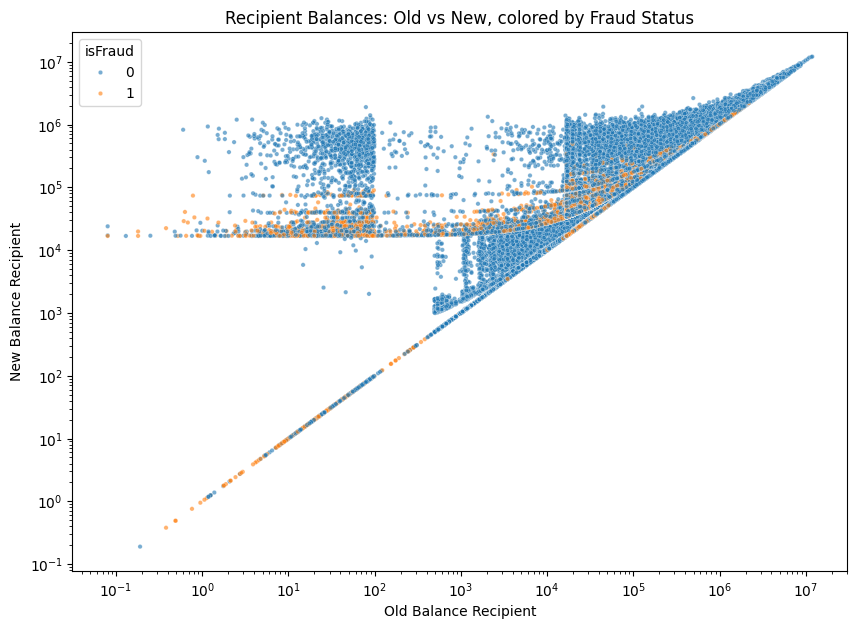

In [80]:
# Scatter plot: 'oldBalRecipient' vs 'newBalRecipient' with 'isFraud' hue
plt.figure(figsize=(10, 7))
sns.scatterplot(x='oldBalRecipient', y='newBalRecipient', hue='isFraud', data=df_plot, alpha=0.6, s=10)
plt.title('Recipient Balances: Old vs New, colored by Fraud Status')
plt.xlabel('Old Balance Recipient')
plt.ylabel('New Balance Recipient')
plt.xscale('log')
plt.yscale('log')
plt.show()

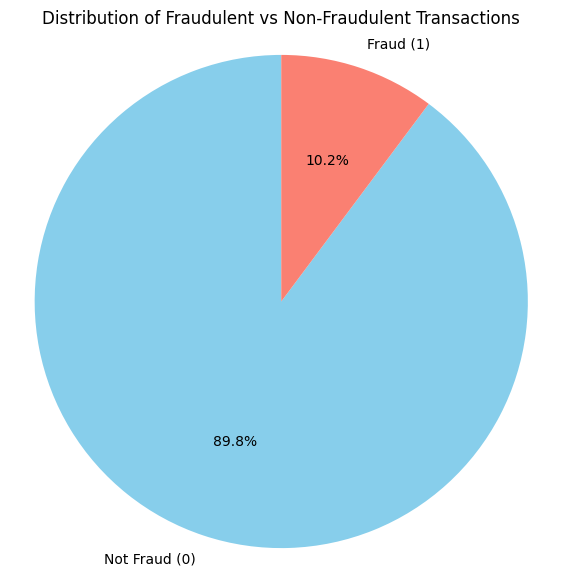

In [81]:
# Pie chart: 'isFraud' distribution
fraud_counts = df_plot['isFraud'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(fraud_counts, labels=['Not Fraud (0)', 'Fraud (1)'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

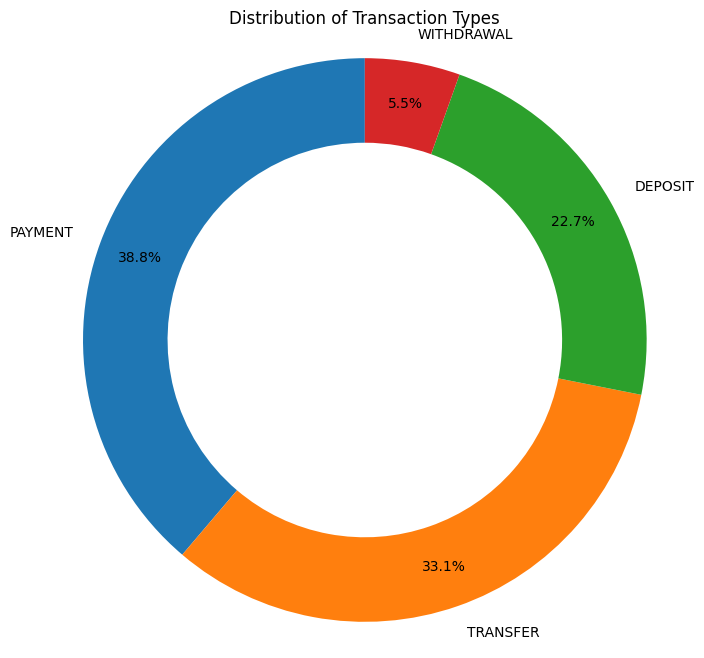

In [82]:
# Pie chart: 'transactionType' distribution (if column exists)
if 'transactionType' in df_plot.columns:
    transaction_type_counts = df_plot['transactionType'].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(transaction_type_counts, labels=transaction_type_counts.index, autopct='%1.1f%%', startangle=90,
            pctdistance=0.85, wedgeprops=dict(width=0.3)) # Donut chart
    plt.title('Distribution of Transaction Types')
    plt.axis('equal')
    plt.show()
else:
    print("\nSkipping 'transactionType' pie chart as the column is not available.")


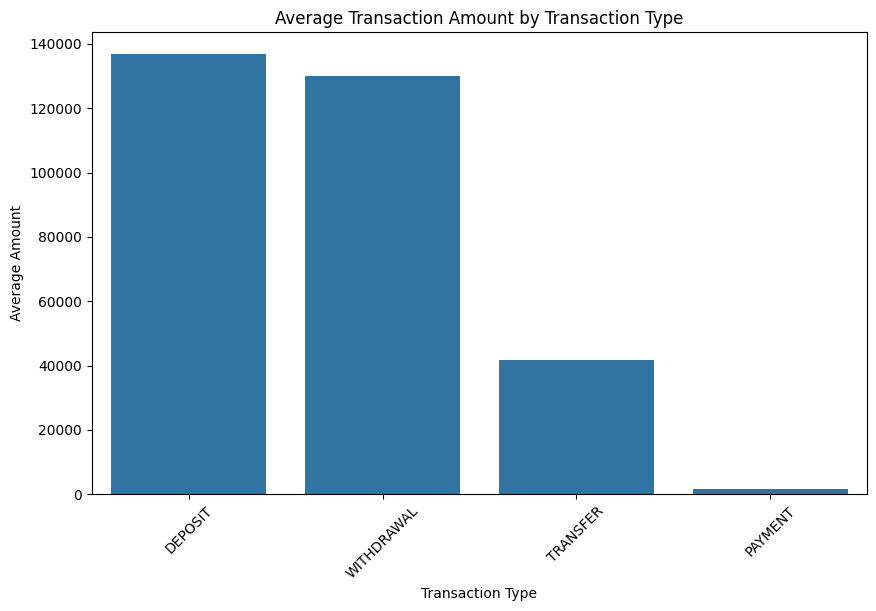

In [83]:
# Bar chart: Average 'amount' by 'transactionType' (if column exists)
if 'transactionType' in df_plot.columns:
    avg_amount_by_type = df_plot.groupby('transactionType')['amount'].mean().sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=avg_amount_by_type.index, y=avg_amount_by_type.values)
    plt.title('Average Transaction Amount by Transaction Type')
    plt.xlabel('Transaction Type')
    plt.ylabel('Average Amount')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("\nSkipping 'Average amount by transactionType' bar chart as the column is not available.")

C:\Users\USER\AppData\Local\Temp\ipykernel_27128\2313626886.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_percentage_by_type.index, y=fraud_percentage_by_type.values, palette='viridis')


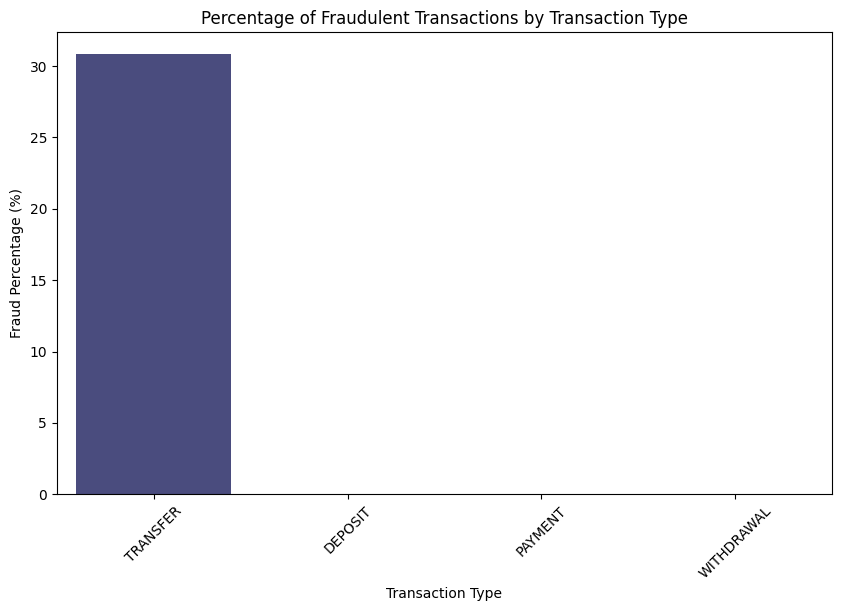

In [84]:
# Bar chart: Fraud percentage by 'transactionType' (if column exists)
if 'transactionType' in df_plot.columns:
    fraud_percentage_by_type = df_plot.groupby('transactionType')['isFraud'].mean().sort_values(ascending=False) * 100
    plt.figure(figsize=(10, 6))
    sns.barplot(x=fraud_percentage_by_type.index, y=fraud_percentage_by_type.values, palette='viridis')
    plt.title('Percentage of Fraudulent Transactions by Transaction Type')
    plt.xlabel('Transaction Type')
    plt.ylabel('Fraud Percentage (%)')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("\nSkipping 'Fraud percentage by transactionType' bar chart as the column is not available.")

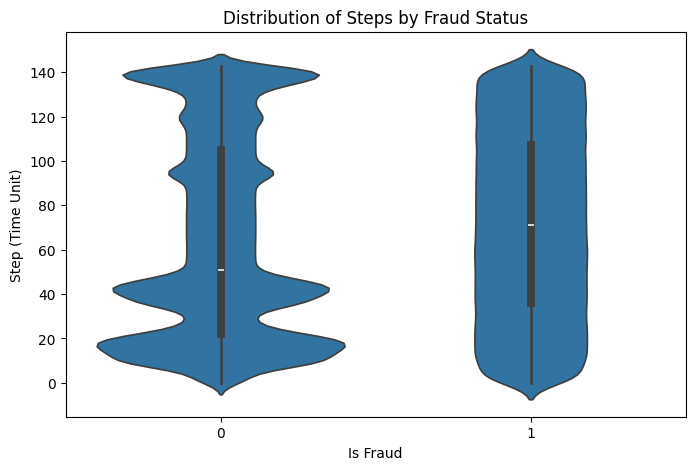

In [86]:
# Violin plot: 'step' vs 'isFraud'
plt.figure(figsize=(8, 5))
sns.violinplot(x='isFraud', y='step', data=df_plot)
plt.title('Distribution of Steps by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Step (Time Unit)')
plt.show()



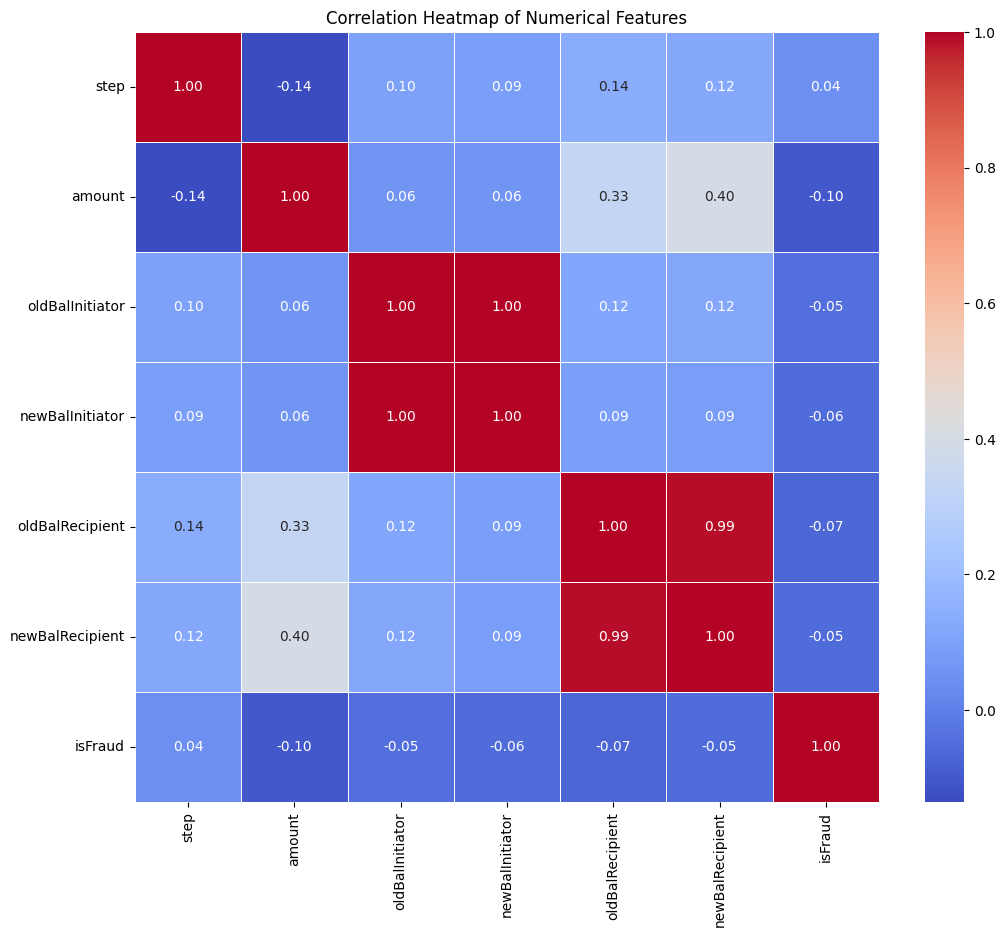

In [88]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
# Select only numerical columns for correlation to avoid ValueError from string columns
numerical_df_plot = df_plot.select_dtypes(include=['number'])
sns.heatmap(numerical_df_plot.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


##  Balancing Dataset ##

In [100]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split # Corrected module name

print("--- Balancing Dataset ---")

y = df_plot['isFraud']

X = df_plot.select_dtypes(include=['number']).drop(columns=['isFraud'], errors='ignore')

print(f"Original dataset shape: {X.shape}, {y.shape}")
print("Original class distribution:")
print(y.value_counts())
print(y.value_counts(normalize=True) * 100)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("\nDataset shape after SMOTE:")
print(f"Resampled dataset shape: {X_resampled.shape}, {y_resampled.shape}")
print("Resampled class distribution:")
print(y_resampled.value_counts())
print(y_resampled.value_counts(normalize=True) * 100)


--- Balancing Dataset ---
Original dataset shape: (1720054, 6), (1720054,)
Original class distribution:
isFraud
0    1544536
1     175518
Name: count, dtype: int64
isFraud
0    89.795785
1    10.204215
Name: proportion, dtype: float64

Dataset shape after SMOTE:
Resampled dataset shape: (3089072, 6), (3089072,)
Resampled class distribution:
isFraud
1    1544536
0    1544536
Name: count, dtype: int64
isFraud
1    50.0
0    50.0
Name: proportion, dtype: float64
